<a href="https://colab.research.google.com/github/Charmie13/MSCI-641-Text-Analytics_Final-Project/blob/main/Combined_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import csv
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [ ]:
train_bodies = pd.read_csv('train_bodies.csv')
train_bodies.head(10)

In [ ]:
test_bodies = pd.read_csv('competition_test_bodies.csv')
test_bodies.head(10)

In [4]:
# load training data
train_df = pd.read_csv('train_stances.csv')
# load testing data
test_df = pd.read_csv('competition_test_stances.csv')

In [5]:
train_df.replace('unrelated',0,True)
train_df.replace('agree',1,True)
train_df.replace('disagree',2,True)
train_df.replace('discuss',3,True)

test_df.replace('unrelated',0,True)
test_df.replace('agree',1,True)
test_df.replace('disagree',2,True)
test_df.replace('discuss',3,True)


In [6]:
def labels(row):
  if row['Stance'] == 0:
    return 1
  else:
    return 0

train_df['Modified Labels'] = train_df.apply(labels, axis=1)

In [ ]:
train_df

In [8]:
combined_df_train = train_df.join(train_bodies.set_index('Body ID'), on='Body ID')
combined_df_test = test_df.join(test_bodies.set_index('Body ID'), on='Body ID')

In [ ]:
combined_df_train['Modified Labels'].value_counts()

In [10]:
combined_df_train

,Headline,Body ID,Stance,Modified Labels,articleBody
0,Police find mass graves with at least '15 bodi...,712,0,1,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,1,0,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,0,1,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,0,1,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,2,0,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,0,1,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,0,1,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,1,0,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,3,0,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [12]:
target1 = ['Stance']
features1 = ['Headline', 'Body ID', 'Modified Labels', 'articleBody']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

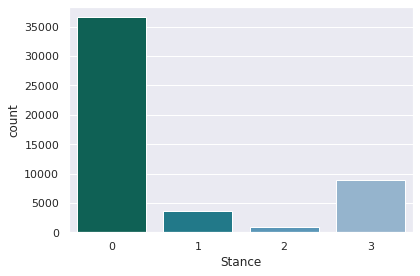

In [15]:
x1 = combined_df_train[features1]
y1 = combined_df_train[target1]

fig, (ax1) = plt.subplots(1,1)
sns.set_theme(style="darkgrid")
palette = sns.color_palette("PuBuGn_r")
sns.countplot(x = "Stance", data = combined_df_train, ax=ax1, palette=palette)
fig.tight_layout()
fig.show()

In [16]:
features = ['Headline', 'Body ID', 'Stance', 'articleBody']
target = ['Modified Labels']

In [17]:
x = combined_df_train[features]
y = combined_df_train[target]

In [18]:
from collections import Counter

In [42]:
y_label = y["Modified Labels"]
under_sampler = RandomUnderSampler(random_state=42)
print('Before sampling label dataset shape {}'.format(Counter(y_label)))
X_label, y_label = under_sampler.fit_resample(x, y_label)
print('Resampled dataset shape {}'.format(Counter(y_label)))

Before sampling label dataset shape Counter({1: 36545, 0: 13427})
Resampled dataset shape Counter({0: 13427, 1: 13427})


In [20]:
train_reduced = pd.concat([X_label, y_label], axis = 1)

In [ ]:
train_reduced

In [ ]:
train_reduced.shape

In [23]:
y_label1 = y["Modified Labels"]
over_sampler = RandomOverSampler(random_state=42)
print('Before sampling label dataset shape {}'.format(Counter(y_label1)))
X_label, y_label1 = over_sampler.fit_resample(x, y_label1)
print('Resampled dataset shape {}'.format(Counter(y_label1)))

Before sampling label dataset shape Counter({1: 36545, 0: 13427})
Resampled dataset shape Counter({1: 36545, 0: 36545})


In [24]:
train_oversample = pd.concat([X_label, y_label1], axis = 1)

In [ ]:
train_oversample

In [ ]:
train_oversample.shape

In [ ]:
combined_df_test.shape

In [ ]:
combined_df_test

In [29]:
stances = train_reduced['Stance']
stances.replace(0, 'unrelated',True)
stances.replace(1, 'agree',True)
stances.replace(2, 'disagree',True)
stances.replace(3, 'discuss',True)

In [ ]:
stances

In [ ]:
train_reduced

In [32]:
train_reduced.shape

(26854, 5)

In [33]:
stances2 = train_oversample['Stance']
stances2.replace(0, 'unrelated',True)
stances2.replace(1, 'agree',True)
stances2.replace(2, 'disagree',True)
stances2.replace(3, 'discuss',True)

In [ ]:
stances2

In [ ]:
train_oversample

In [ ]:
train_oversample.shape

In [37]:
stances1 = combined_df_test['Stance']
stances1.replace(0, 'agree',True)
stances1.replace(1, 'disagree',True)
stances1.replace(2, 'discuss',True)
stances1.replace(3, 'unrelated',True)
combined_df_test['Stance'] = stances1

In [ ]:
combined_df_test

In [39]:
train_reduced = train_reduced.drop(columns=['Modified Labels'])

In [ ]:
train_reduced

In [41]:
train_oversample = train_oversample.drop(columns=['Modified Labels'])

In [ ]:
train_oversample.to_csv('train_oversample.csv', index=False, encoding='utf-8')

In [ ]:
from google.colab import files
files.download('train_oversample.csv') 

In [ ]:
train_reduced.to_csv('train_reduced.csv', index=False, encoding='utf-8')

In [ ]:
files.download('train_reduced.csv') 

In [ ]:
combined_df_test.to_csv('test.csv', index=False, encoding='utf-8')

In [ ]:
files.download('test.csv') 